In [1]:
import pandas as pd
from pathlib import Path
import random
import torch_geometric
import json

In [2]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_parent_dir = os.path.dirname(parent_dir)

sys.path.append(parent_dir)
sys.path.append(parent_parent_dir)

from utils import GenerationModule, MolGen, tensor_to_smiles

In [3]:
# read the configs
name1 = 'GNN1_charged_kekulized'
epoch1 = 0
name2 = 'GNN2_charged_kekulized'
epoch2 = 0
name3 = 'GNN3_charged_kekulized'
epoch3 = 0
config1_path = Path('..') / 'Train' / 'GNN1' / 'config_GNN1.json'
config2_path = Path('..') / 'Train' / 'GNN2' / 'config_GNN2.json'
config3_path = Path('..') / 'Train' / 'GNN3' / 'config_GNN3.json'

# Read the config as a json

with open(config1_path, 'r') as f:
    config1 = json.load(f)
with open(config2_path, 'r') as f:
    config2 = json.load(f)
with open(config3_path, 'r') as f:
    config3 = json.load(f)



In [4]:
GNN1_path = Path('.') / 'models/trained_models/GNN1_checkpoint_5.pt'
GNN2_path = Path('.') / 'models/trained_models/GNN2_checkpoint_2.pt'
GNN3_path = Path('.') / 'models/trained_models/GNN3_checkpoint_5.pt'

module = GenerationModule(config1=config1, config2=config2, config3=config3, encoding_size = 13, edge_size = 3, pathGNN1=GNN1_path, pathGNN2=GNN2_path, pathGNN3=GNN3_path)

In [11]:
graph = module.generate_mol_list(100)

100%|██████████| 100/100 [00:54<00:00,  1.85it/s]


In [12]:
# Convert the graph to smiles

def convert_to_smiles(graph):
    smiles = []
    for g in graph:
        smiles.append(tensor_to_smiles(g.x, g.edge_index, g.edge_attr, edge_mapping='kekulized'))
    return smiles

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG

def draw_molecules(molecules):
    smiles_list = convert_to_smiles(molecules)
    mols = [Chem.MolFromSmiles(m) for m in smiles_list]
    return Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), maxMols=50)

In [15]:
smiles_list = convert_to_smiles(graph)

In [16]:
# check if the molecules are valid

def check_validity(smiles_list):
    valid = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            valid.append(smiles)
    return valid

In [17]:
valid = check_validity(smiles_list)

[10:36:40] Explicit valence for atom # 13 C, 5, is greater than permitted


In [18]:
# get the not valid molecules

not_valid = [smiles for smiles in smiles_list if smiles not in valid]

In [19]:
not_valid

['CCCC1=NC(CC)=C(C2NC(=O)C(F)(F)(F)C(F)(F)C2(F)F)C(CC)=N1']

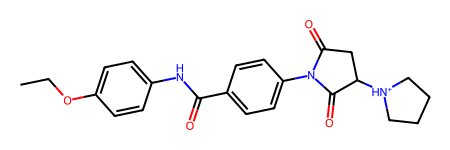

In [21]:
Chem.MolFromSmiles('CCOC1=CC=C(NC(=O)C2=CC=C(N3C(=O)CC([NH+]4CCCC4)C3=O)C=C2)C=C1', sanitize = False)

[10:34:49] Explicit valence for atom # 13 C, 5, is greater than permitted
c:\Users\goupi\.conda\envs\torch_geometric\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


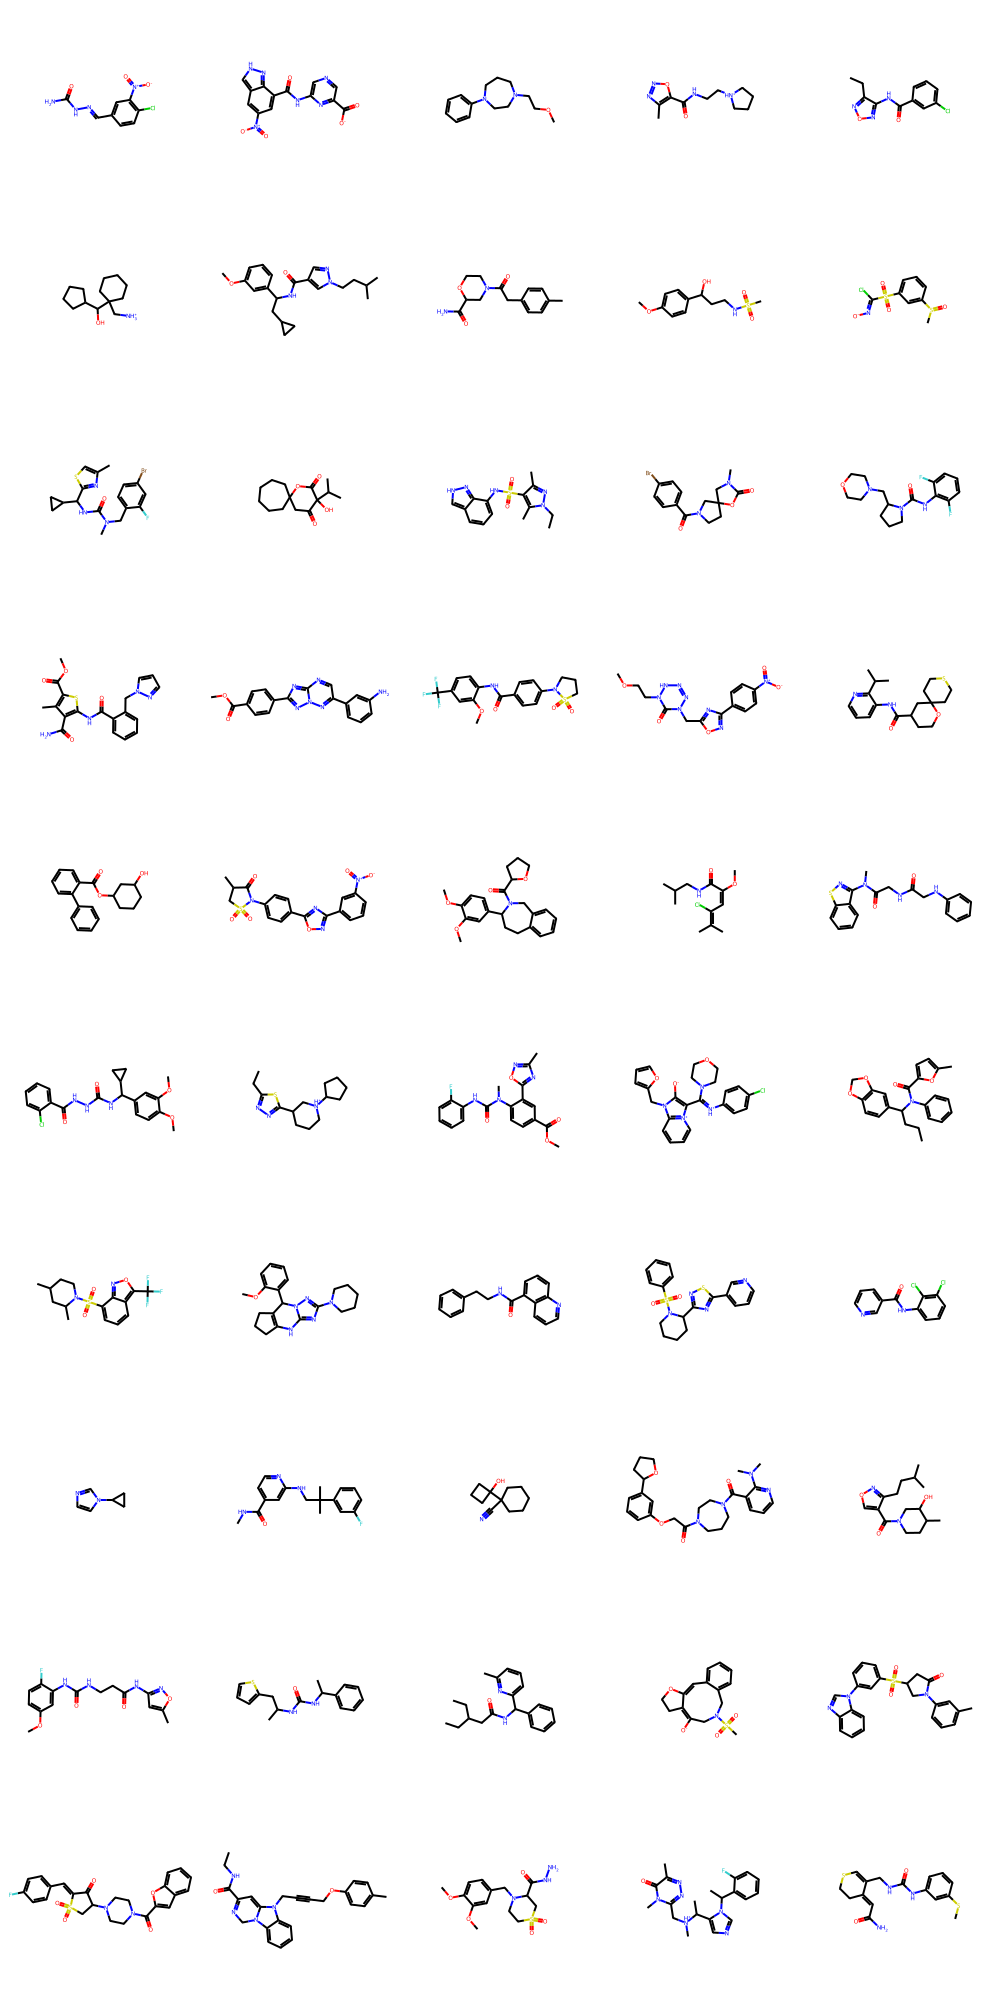

In [14]:
draw_molecules(graph)